FILE ON AUGMENTATION TECHNIQUES APPLIED

We take 5 images of CIFAR 10 and show effects of different augmentation techniques


In [0]:
from collections import namedtuple

import torch
import torch.nn as nn
import torch.nn.functional as F

In [0]:
__all__ = ['Inception3', 'inception_v3']

_InceptionOutputs = namedtuple('InceptionOutputs', ['logits', 'aux_logits'])

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
if not os.path.exists('/content/drive/My Drive/Inception_CIFAR10/'):
  os.makedirs('/content/drive/My Drive/Inception_CIFAR10/')
os.chdir('/content/drive/My Drive/Inception_CIFAR10/')

In [0]:
!ls


In [0]:
import os
import time

import torch
import torch.utils.data
import torchvision
from torchvision import transforms

In [0]:
# incremental training comments out that line of code.

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

WORK_DIR = './data'
NUM_EPOCHS = 100
BATCH_SIZE = 64
#LEARNING_RATE = 0.01

MODEL_PATH = './model'
MODEL_NAME = 'Inception_v3.pth'

# Create model
if not os.path.exists(MODEL_PATH):
  os.makedirs(MODEL_PATH)


IMAGES WITHOUT AUGMETATION

Files already downloaded and verified


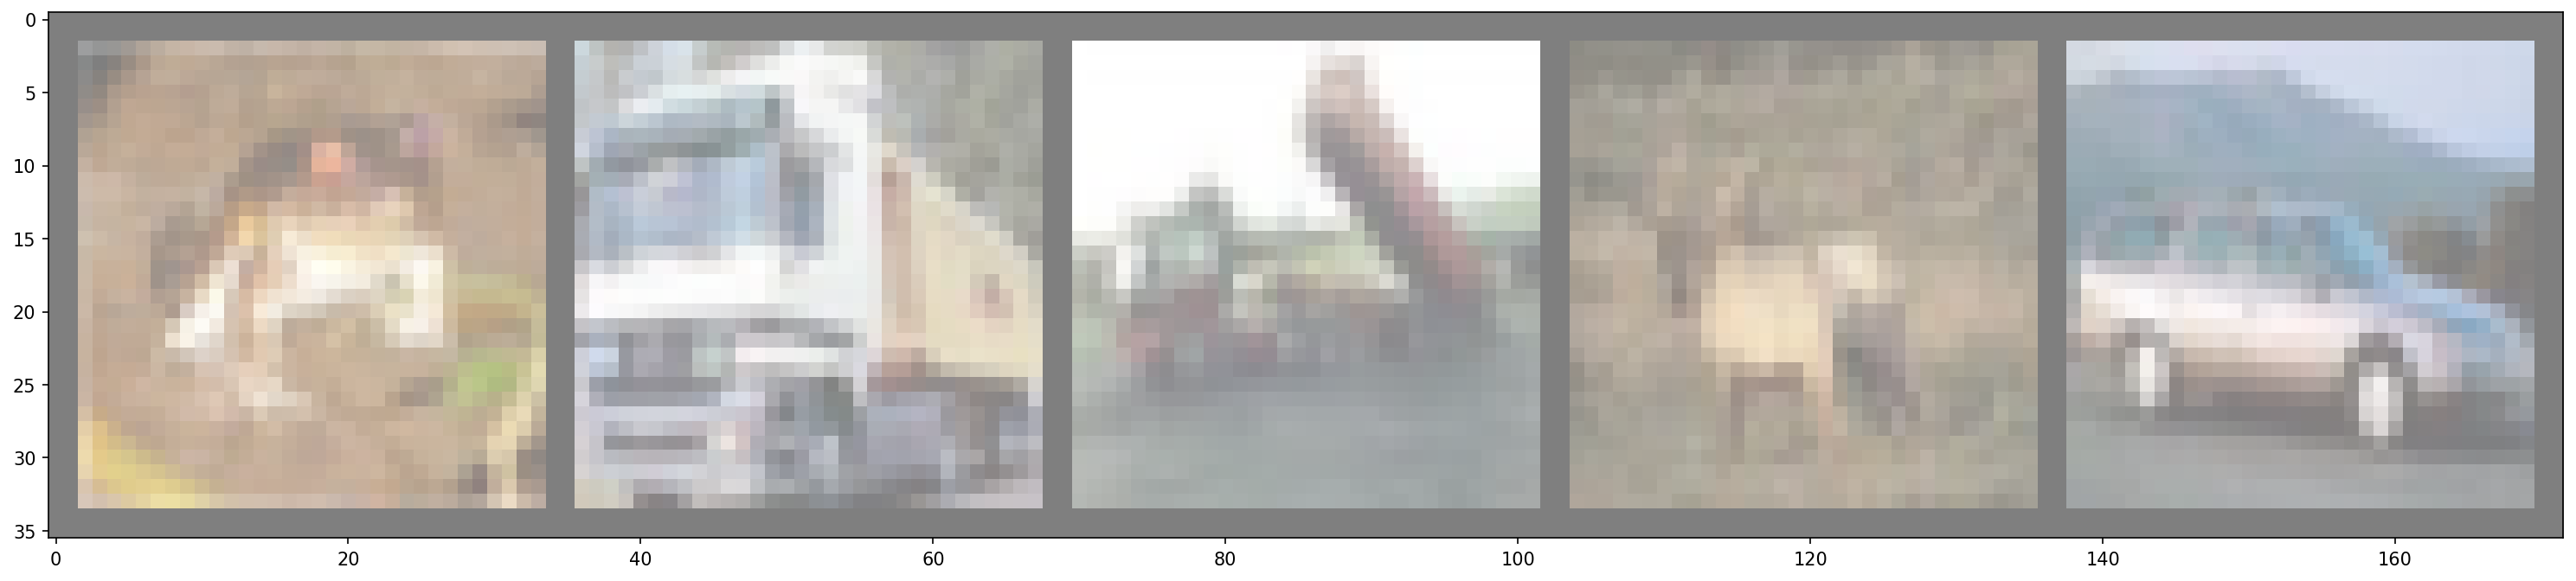

 frog truck truck  deer   car


In [45]:
transform = transforms.Compose([
  #transforms.RandomCrop(32, padding=4),
  #torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.4, saturation=0.5, hue=0.1),
  #transforms.RandomHorizontalFlip(),
  #torchvision.transforms.RandomVerticalFlip(),
  # torchvision.transforms.RandomAffine(degrees=0, translate=(0.2,0.2), scale=None,shear=50, resample=False, fillcolor=0),
  #torchvision.transforms.RandomRotation((20), resample=False,expand=False, center=None),
  transforms.ToTensor(),
  #transforms.Normalize([0.4913997551666284, 0.48215855929893703, 0.4465309133731618], [0.24703225141799082, 0.24348516474564, 0.26158783926049628])
])

# Load data
dataset = torchvision.datasets.CIFAR10(root=WORK_DIR,
                                        download=True,
                                        train=True,
                                        transform=transform)

dataset_loader = torch.utils.data.DataLoader(dataset=dataset,
                                             batch_size=5,
                                             shuffle=False)
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 25), dpi=150, facecolor='w', edgecolor='k')
# functions to show an image
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(dataset_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))

IMAGES WITH NORMALIZATION

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


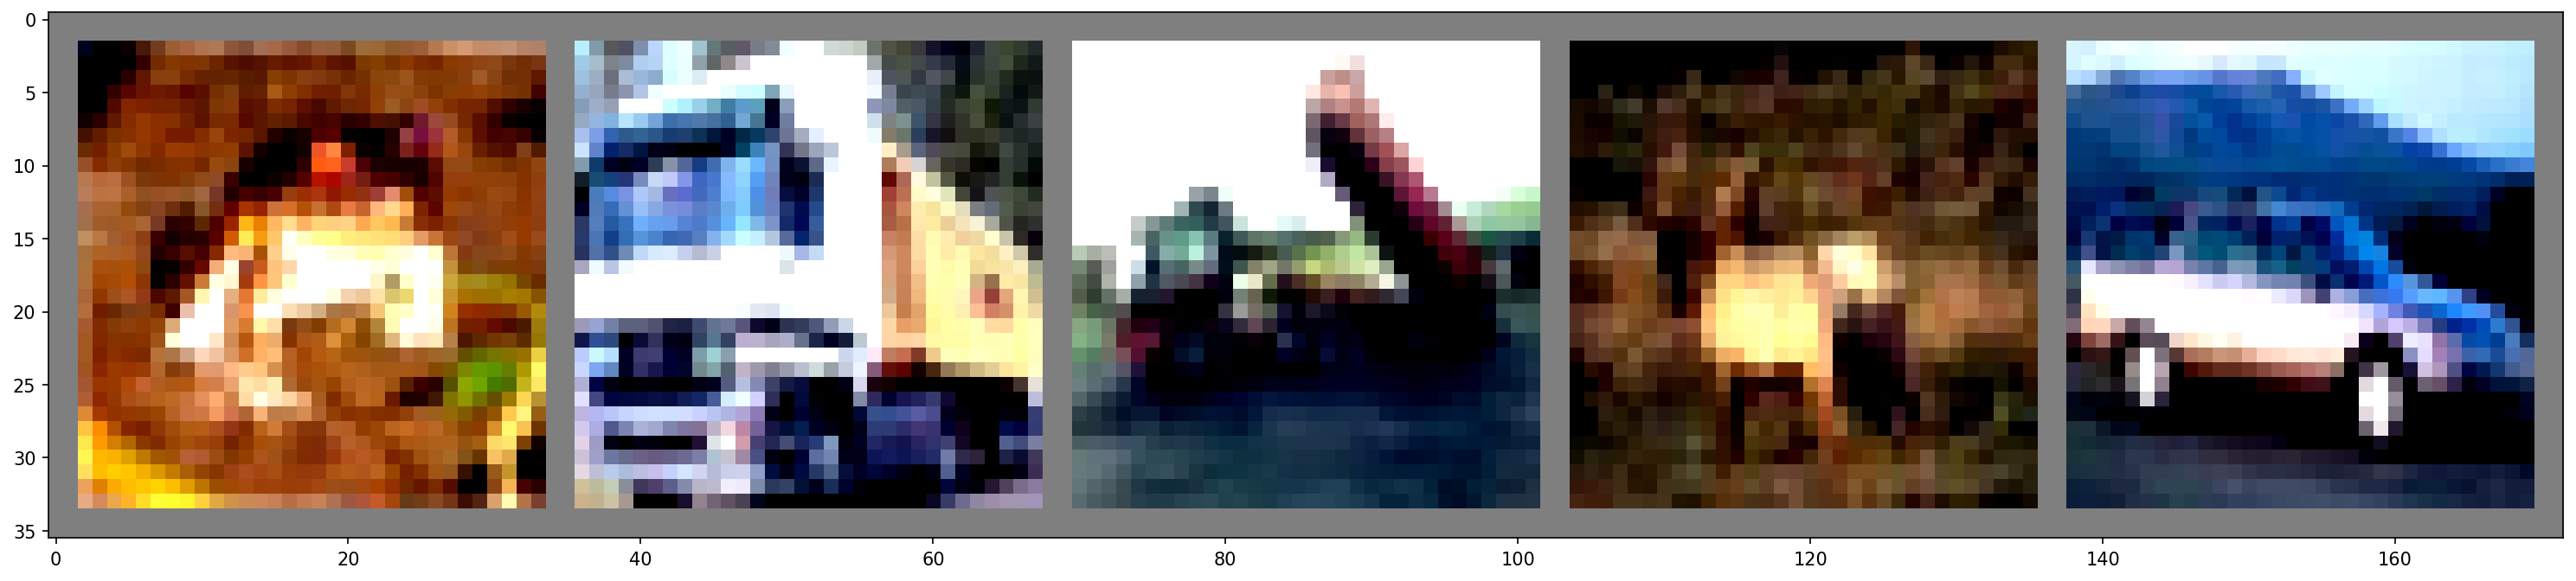

 frog truck truck  deer   car


In [44]:
transform = transforms.Compose([
  #transforms.RandomCrop(32, padding=4),
  #torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.4, saturation=0.5, hue=0.1),
  #transforms.RandomHorizontalFlip(),
  #torchvision.transforms.RandomVerticalFlip(),
  # torchvision.transforms.RandomAffine(degrees=0, translate=(0.2,0.2), scale=None,shear=50, resample=False, fillcolor=0),
  #torchvision.transforms.RandomRotation((20), resample=False,expand=False, center=None),
  transforms.ToTensor(),
  transforms.Normalize([0.4913997551666284, 0.48215855929893703, 0.4465309133731618], [0.24703225141799082, 0.24348516474564, 0.26158783926049628])
])

# Load data
dataset = torchvision.datasets.CIFAR10(root=WORK_DIR,
                                        download=True,
                                        train=True,
                                        transform=transform)

dataset_loader = torch.utils.data.DataLoader(dataset=dataset,
                                             batch_size=5,
                                             shuffle=False)
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 25), dpi=150, facecolor='w', edgecolor='k')
# functions to show an image
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(dataset_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))

NORMALIZED IMAGES WITH RANDOM CROP

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


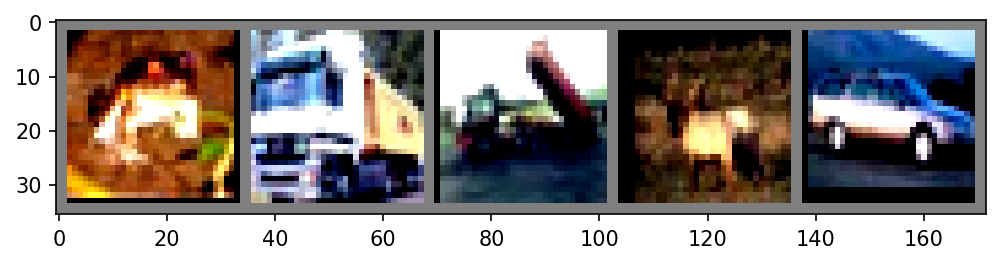

 frog truck truck  deer   car


In [43]:
transform = transforms.Compose([
  transforms.RandomCrop(32, padding=4),
  #torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.4, saturation=0.5, hue=0.1),
  #transforms.RandomHorizontalFlip(),
  #torchvision.transforms.RandomVerticalFlip(),
  # torchvision.transforms.RandomAffine(degrees=0, translate=(0.2,0.2), scale=None,shear=50, resample=False, fillcolor=0),
  #torchvision.transforms.RandomRotation((20), resample=False,expand=False, center=None),
  transforms.ToTensor(),
  transforms.Normalize([0.4913997551666284, 0.48215855929893703, 0.4465309133731618], [0.24703225141799082, 0.24348516474564, 0.26158783926049628])
])

# Load data
dataset = torchvision.datasets.CIFAR10(root=WORK_DIR,
                                        download=True,
                                        train=True,
                                        transform=transform)

dataset_loader = torch.utils.data.DataLoader(dataset=dataset,
                                             batch_size=5,
                                             shuffle=False)
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 8), dpi=150, facecolor='w', edgecolor='k')
# functions to show an image
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(dataset_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))

NORMALIZED IMAGES WITH COLOR JITTER (brightness=0.2, contrast=0.4, saturation=0.5, hue=0.1)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


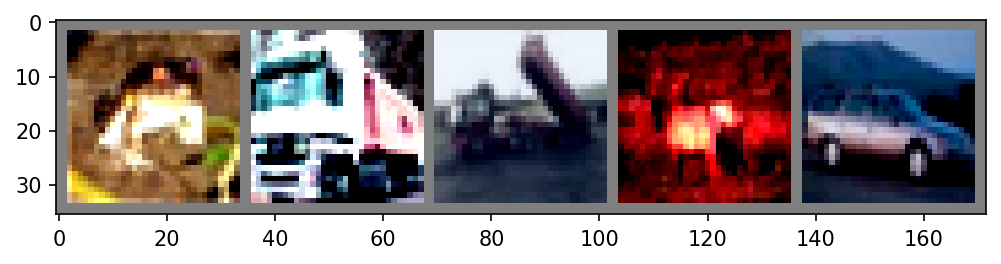

 frog truck truck  deer   car


In [50]:
transform = transforms.Compose([
  #transforms.RandomCrop(32, padding=4),
  torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.4, saturation=0.5, hue=0.1),
  #transforms.RandomHorizontalFlip(),
  #torchvision.transforms.RandomVerticalFlip(),
  # torchvision.transforms.RandomAffine(degrees=0, translate=(0.2,0.2), scale=None,shear=50, resample=False, fillcolor=0),
  #torchvision.transforms.RandomRotation((20), resample=False,expand=False, center=None),
  transforms.ToTensor(),
  transforms.Normalize([0.4913997551666284, 0.48215855929893703, 0.4465309133731618], [0.24703225141799082, 0.24348516474564, 0.26158783926049628])
])

# Load data
dataset = torchvision.datasets.CIFAR10(root=WORK_DIR,
                                        download=True,
                                        train=True,
                                        transform=transform)

dataset_loader = torch.utils.data.DataLoader(dataset=dataset,
                                             batch_size=5,
                                             shuffle=False)
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 8), dpi=150, facecolor='w', edgecolor='k')
# functions to show an image
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(dataset_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))

NORMALIZED IMAGES HORIZONTALLY FLIPPED

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


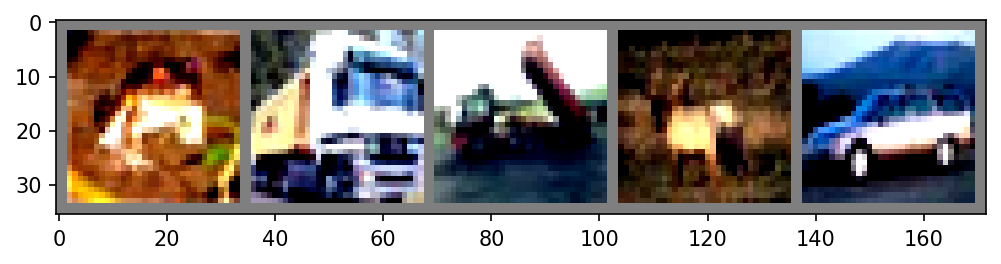

 frog truck truck  deer   car


In [51]:
transform = transforms.Compose([
  #transforms.RandomCrop(32, padding=4),
  #torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.4, saturation=0.5, hue=0.1),
  transforms.RandomHorizontalFlip(),
  #torchvision.transforms.RandomVerticalFlip(),
  # torchvision.transforms.RandomAffine(degrees=0, translate=(0.2,0.2), scale=None,shear=50, resample=False, fillcolor=0),
  #torchvision.transforms.RandomRotation((20), resample=False,expand=False, center=None),
  transforms.ToTensor(),
  transforms.Normalize([0.4913997551666284, 0.48215855929893703, 0.4465309133731618], [0.24703225141799082, 0.24348516474564, 0.26158783926049628])
])

# Load data
dataset = torchvision.datasets.CIFAR10(root=WORK_DIR,
                                        download=True,
                                        train=True,
                                        transform=transform)

dataset_loader = torch.utils.data.DataLoader(dataset=dataset,
                                             batch_size=5,
                                             shuffle=False)
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 8), dpi=150, facecolor='w', edgecolor='k')
# functions to show an image
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(dataset_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))

NORMALIZED IMAGES VERTICALLY FLIPPED

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


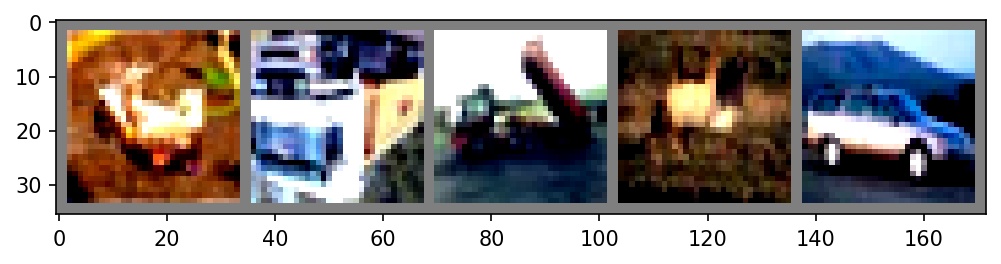

 frog truck truck  deer   car


In [52]:
transform = transforms.Compose([
  #transforms.RandomCrop(32, padding=4),
  #torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.4, saturation=0.5, hue=0.1),
  #transforms.RandomHorizontalFlip(),
  torchvision.transforms.RandomVerticalFlip(),
  # torchvision.transforms.RandomAffine(degrees=0, translate=(0.2,0.2), scale=None,shear=50, resample=False, fillcolor=0),
  #torchvision.transforms.RandomRotation((20), resample=False,expand=False, center=None),
  transforms.ToTensor(),
  transforms.Normalize([0.4913997551666284, 0.48215855929893703, 0.4465309133731618], [0.24703225141799082, 0.24348516474564, 0.26158783926049628])
])

# Load data
dataset = torchvision.datasets.CIFAR10(root=WORK_DIR,
                                        download=True,
                                        train=True,
                                        transform=transform)

dataset_loader = torch.utils.data.DataLoader(dataset=dataset,
                                             batch_size=5,
                                             shuffle=False)
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 8), dpi=150, facecolor='w', edgecolor='k')
# functions to show an image
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(dataset_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))

NORMALIZED IMAGES WITH AFFINE (degrees=0, translate=(0.2,0.2), scale=None,shear=50, resample=False, fillcolor=0)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


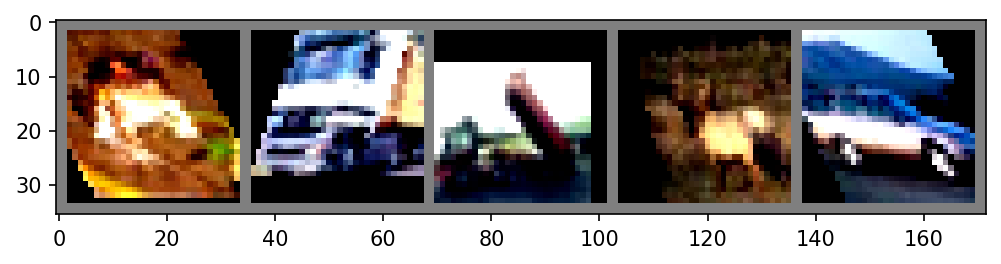

 frog truck truck  deer   car


In [54]:
transform = transforms.Compose([
  #transforms.RandomCrop(32, padding=4),
  #torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.4, saturation=0.5, hue=0.1),
  #transforms.RandomHorizontalFlip(),
  #torchvision.transforms.RandomVerticalFlip(),
  torchvision.transforms.RandomAffine(degrees=0, translate=(0.2,0.2), scale=None,shear=50, resample=False, fillcolor=0),
  #torchvision.transforms.RandomRotation((20), resample=False,expand=False, center=None),
  transforms.ToTensor(),
  transforms.Normalize([0.4913997551666284, 0.48215855929893703, 0.4465309133731618], [0.24703225141799082, 0.24348516474564, 0.26158783926049628])
])

# Load data
dataset = torchvision.datasets.CIFAR10(root=WORK_DIR,
                                        download=True,
                                        train=True,
                                        transform=transform)

dataset_loader = torch.utils.data.DataLoader(dataset=dataset,
                                             batch_size=5,
                                             shuffle=False)
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 8), dpi=150, facecolor='w', edgecolor='k')
# functions to show an image
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(dataset_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))

NORMALIZED IMAGES WITH 20 DEGREE ROTATION

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


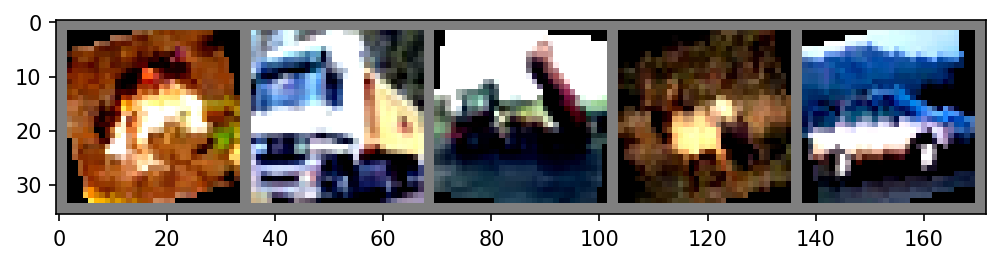

 frog truck truck  deer   car


In [55]:
transform = transforms.Compose([
  #transforms.RandomCrop(32, padding=4),
  #torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.4, saturation=0.5, hue=0.1),
  #transforms.RandomHorizontalFlip(),
  #torchvision.transforms.RandomVerticalFlip(),
  # torchvision.transforms.RandomAffine(degrees=0, translate=(0.2,0.2), scale=None,shear=50, resample=False, fillcolor=0),
  torchvision.transforms.RandomRotation((20), resample=False,expand=False, center=None),
  transforms.ToTensor(),
  transforms.Normalize([0.4913997551666284, 0.48215855929893703, 0.4465309133731618], [0.24703225141799082, 0.24348516474564, 0.26158783926049628])
])

# Load data
dataset = torchvision.datasets.CIFAR10(root=WORK_DIR,
                                        download=True,
                                        train=True,
                                        transform=transform)

dataset_loader = torch.utils.data.DataLoader(dataset=dataset,
                                             batch_size=5,
                                             shuffle=False)
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 8), dpi=150, facecolor='w', edgecolor='k')
# functions to show an image
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(dataset_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))